# 🌲🌲 Random Forest 🌲🌲

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

It is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.

## Picture speaks better than words 🤓

Below is the simple ilustration of how a Random forest works 

![title](rf.png)

## Import the requried libraries ⤵️

In [1]:
# to read the data and manipulate the data
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data as web

# for data visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
# from prettytable import PrettyTable

# for statistical analysis
import scipy.stats as ss
from scipy.optimize import minimize

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
start_date = datetime(2018,10,10)
end_date = datetime(2019,10,10)
visa = web.DataReader('V', 'yahoo', start_date ,end_date)
visa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-10,142.690002,135.210007,142.570007,135.520004,15450100.0,132.561035
2018-10-11,137.240005,132.259995,134.089996,133.729996,15657200.0,130.810150
2018-10-12,140.979996,137.429993,138.479996,140.059998,12993300.0,137.001923
2018-10-15,140.059998,137.220001,139.899994,137.229996,7953000.0,134.233704
2018-10-16,142.139999,138.679993,138.710007,141.740005,11059500.0,138.645233


In [3]:
visa.reset_index(inplace=True)
visa.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-10-10,142.690002,135.210007,142.570007,135.520004,15450100.0,132.561035
1,2018-10-11,137.240005,132.259995,134.089996,133.729996,15657200.0,130.810150
2,2018-10-12,140.979996,137.429993,138.479996,140.059998,12993300.0,137.001923
3,2018-10-15,140.059998,137.220001,139.899994,137.229996,7953000.0,134.233704
4,2018-10-16,142.139999,138.679993,138.710007,141.740005,11059500.0,138.645233


In [4]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   High       252 non-null    float64       
 2   Low        252 non-null    float64       
 3   Open       252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Volume     252 non-null    float64       
 6   Adj Close  252 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [5]:
# read the dataset using pandas 
df = pd.read_csv('FF3-df_final.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Daily_Rtn
0,2017-09-12,106.639999,106.639999,105.760002,106.209999,103.205780,5212400,0.44,0.24,0.73,0.005,0.000565
1,2017-09-13,106.260002,106.260002,105.239998,105.830002,102.836548,6215700,0.11,0.30,0.36,0.005,-0.003578
2,2017-09-14,105.500000,106.839996,105.500000,106.080002,103.079460,8154000,-0.12,-0.04,-0.07,0.005,0.002362
3,2017-09-15,105.739998,106.139999,104.949997,105.300003,102.321533,12622900,0.19,0.29,0.14,0.005,-0.007353
4,2017-09-18,105.349998,105.519997,104.620003,104.830002,101.864838,7330300,0.24,0.39,0.20,0.005,-0.004463


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
 7   Mkt-RF     523 non-null    float64
 8   SMB        523 non-null    float64
 9   HML        523 non-null    float64
 10  RF         523 non-null    float64
 11  Daily_Rtn  523 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 49.2+ KB


### Date Column is of type *object*. We need to convert it to type *datetime64[ns]*. You'll later figure out why! 🤔

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       523 non-null    datetime64[ns]
 1   Open       523 non-null    float64       
 2   High       523 non-null    float64       
 3   Low        523 non-null    float64       
 4   Close      523 non-null    float64       
 5   Adj Close  523 non-null    float64       
 6   Volume     523 non-null    int64         
 7   Mkt-RF     523 non-null    float64       
 8   SMB        523 non-null    float64       
 9   HML        523 non-null    float64       
 10  RF         523 non-null    float64       
 11  Daily_Rtn  523 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 49.2 KB


In [8]:
# Typical_Price is the mean value of High, Low and Close cols
df['Typical_Price'] = df[['High','Low','Close']].mean(axis=1)
df['Typical_Price_returns'] = (np.log(df.Typical_Price) - np.log(df.Typical_Price.shift(1))) * 100.
df['Volume_returns'] = (np.log(df.Volume) - np.log(df.Volume.shift(1))) * 100.
df

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Daily_Rtn,Typical_Price,Typical_Price_returns,Volume_returns
0,2017-09-12,106.639999,106.639999,105.760002,106.209999,103.205780,5212400,0.44,0.24,0.73,0.005,0.000565,106.203334,NaN,NaN
1,2017-09-13,106.260002,106.260002,105.239998,105.830002,102.836548,6215700,0.11,0.30,0.36,0.005,-0.003578,105.776667,-0.402554,17.603795
2,2017-09-14,105.500000,106.839996,105.500000,106.080002,103.079460,8154000,-0.12,-0.04,-0.07,0.005,0.002362,106.139999,0.342901,27.143026
3,2017-09-15,105.739998,106.139999,104.949997,105.300003,102.321533,12622900,0.19,0.29,0.14,0.005,-0.007353,105.463333,-0.639563,43.700402
4,2017-09-18,105.349998,105.519997,104.620003,104.830002,101.864838,7330300,0.24,0.39,0.20,0.005,-0.004463,104.990000,-0.449823,-54.349618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2019-10-03,169.910004,173.139999,168.630005,172.869995,170.201019,7242800,0.80,-0.23,-0.90,0.007,0.017900,171.546666,0.639378,-38.048757
519,2019-10-04,174.679993,176.520004,174.440002,175.979996,173.263000,6027600,1.39,-0.48,-0.05,0.007,0.017990,175.646667,2.361907,-18.365895
520,2019-10-07,174.660004,175.690002,173.800003,174.899994,172.199692,5248300,-0.41,0.16,-0.02,0.007,-0.006137,174.796666,-0.485101,-13.844471
521,2019-10-08,173.570007,174.639999,171.880005,172.419998,169.757980,5336500,-1.61,-0.12,-0.13,0.007,-0.014180,172.980001,-1.044741,1.666579


In [9]:
# read the ads_vintage file from the directory using pandas
ads_vintage = pd.read_excel("ads_vintages-zip.xlsx")
ads_vintage.head()

,Unnamed: 0,ADS_Index_010319,ADS_Index_010419,ADS_Index_011019,ADS_Index_011719,ADS_Index_011819,ADS_Index_012419,ADS_Index_013119,ADS_Index_020119,ADS_Index_020719,...,ADS_Index_091219,ADS_Index_091719,ADS_Index_091919,ADS_Index_092619,ADS_Index_092719,ADS_Index_100319,ADS_Index_100419,ADS_Index_101019,ADS_Index_101719,ADS_Index_102419
0,1960-03-01,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.824388,-1.824388,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.803702,-1.803702,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.782618,-1.782618,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.761132,-1.761132,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.739243,-1.739243,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


In [10]:
ads_vintage.rename(columns = {'Unnamed: 0':'Date'},inplace=True)
ads_vintage.head()

,Date,ADS_Index_010319,ADS_Index_010419,ADS_Index_011019,ADS_Index_011719,ADS_Index_011819,ADS_Index_012419,ADS_Index_013119,ADS_Index_020119,ADS_Index_020719,...,ADS_Index_091219,ADS_Index_091719,ADS_Index_091919,ADS_Index_092619,ADS_Index_092719,ADS_Index_100319,ADS_Index_100419,ADS_Index_101019,ADS_Index_101719,ADS_Index_102419
0,1960-03-01,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.824388,-1.824388,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.803702,-1.803702,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.782618,-1.782618,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.761132,-1.761132,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.739243,-1.739243,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


We need the Date and the ADS_Index_102419 columns of the data. 

In [11]:
ads_vintage_clean = ads_vintage.loc[:,['Date','ADS_Index_102419']]
ads_vintage_clean.head()

,Date,ADS_Index_102419
0,1960-03-01,-2.395069
1,1960-03-02,-2.369012
2,1960-03-03,-2.341905
3,1960-03-04,-2.313746
4,1960-03-05,-2.284532


In [12]:
ads_vintage_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21855 entries, 0 to 21854
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              21855 non-null  datetime64[ns]
 1   ADS_Index_102419  21782 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 341.6 KB


### Now we can merge the two datasets on Date column as they're now of same datatype.  💡

In [13]:
df = pd.merge(df, ads_vintage_clean, on='Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Daily_Rtn,Typical_Price,Typical_Price_returns,Volume_returns,ADS_Index_102419
0,2017-09-12,106.639999,106.639999,105.760002,106.209999,103.205780,5212400,0.44,0.24,0.73,0.005,0.000565,106.203334,NaN,NaN,-0.165851
1,2017-09-13,106.260002,106.260002,105.239998,105.830002,102.836548,6215700,0.11,0.30,0.36,0.005,-0.003578,105.776667,-0.402554,17.603795,-0.147674
2,2017-09-14,105.500000,106.839996,105.500000,106.080002,103.079460,8154000,-0.12,-0.04,-0.07,0.005,0.002362,106.139999,0.342901,27.143026,-0.128905
3,2017-09-15,105.739998,106.139999,104.949997,105.300003,102.321533,12622900,0.19,0.29,0.14,0.005,-0.007353,105.463333,-0.639563,43.700402,-0.109542
4,2017-09-18,105.349998,105.519997,104.620003,104.830002,101.864838,7330300,0.24,0.39,0.20,0.005,-0.004463,104.990000,-0.449823,-54.349618,-0.047397


# 1. Autoregressive Model

An autoregressive (AR) model predicts future behavior based on past behavior. It's used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. 

In [14]:
class ar1:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [15]:
X_ar = df[['Typical_Price','Volume']].to_numpy()[1:]
X_ar = np.column_stack([np.ones((len(X_ar),1)),X_ar])
Y_ar = df[['Open']].to_numpy()[:-1]

# fitting the model
y_hat_1 = ar1.fit(X_ar,Y_ar)

# 2.Fama French Model

In [16]:
class Fama_French_5F:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
        #rmse = np.sqrt(np.mean((Y-y_hat)**2))
        #ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

SMB stands for "Small [market capitalization] Minus Big" and HML for "High [book-to-market ratio] Minus Low" MktRF stands for "Market Risk Factor"

In [17]:
X_FF = df[['Mkt-RF','SMB','HML','ADS_Index_102419']].to_numpy()[1:]
X_FF = np.column_stack([np.ones((len(X_FF),1)),X_FF])
Y_FF = df[['Open']].to_numpy()[:-1]

y_hat_2 = Fama_French_5F.fit(X_FF,Y_FF)

# 3. Moving Average Model 📈📉

A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.

In [18]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [19]:
X_EMA = df[['Typical_Price_returns','Volume_returns']].to_numpy()[1:]
X_EMA = np.column_stack([np.ones((len(X_EMA),1)),X_EMA])
Y_EMA = df[['Open']].to_numpy()[:-1]

y_hat_3 = moving_average.fit(X_EMA,Y_EMA)

# 4. Random Forest 🌲🌲🌲🌲

In [20]:
def Randomforest():
    
    #AR1
    N = df.shape[0] # Total Number of days
    num_boot = 400 #  Number of bootstraps
    T= 250 #Starting Value
    window = 200
    
    Y =df['Open'][-(N-(T+1)):].values
    Y_close = df['Close'][-(N-(T+1)):].values
    
    y_hat_ar = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price','Volume']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price','Volume']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = ar1.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = ar1.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ar1 = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ar[t-(T+1)]=y_pred_ar1 # do this for each time step
    rmse_ar1 = np.sqrt(np.mean((y_hat_ar-Y)**2))
    print(rmse_ar1)
    
    #FF
    
    y_hat_FF = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Mkt-RF','SMB','HML','ADS_Index_102419']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Mkt-RF','SMB','HML','ADS_Index_102419']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = Fama_French_5F.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = Fama_French_5F.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_FF = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_FF[t-(T+1)]=y_pred_FF # do this for each time step
    rmse_FF = np.sqrt(np.mean((y_hat_FF-Y)**2))
    print(rmse_FF)
    
    
    y_hat_ma = np.zeros(N-(T+1))
    #df['ema'] = df.Typical_Price.ewm(span=5,adjust=False).mean()
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price_returns','Volume_returns']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price_returns','Volume_returns']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = moving_average.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = moving_average.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ma = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ma[t-(T+1)]=y_pred_ma # do this for each time step
    rmse_ma = np.sqrt(np.mean((y_hat_ma-Y)**2))
    print(rmse_ma)
    
    T1 = Y.shape[0]
    Y_rf = np.zeros(T1)
    for t in range(0, T1):
        if min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
               abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ar[t]-Y[t]):
            Y_rf[t] = y_hat_ar[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ma[t]-Y[t]):
            Y_rf[t] = y_hat_ma[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_FF[t]-Y[t]):
            Y_rf[t] = y_hat_FF[t]          
        else:
            Y_rf[t] = y_hat_allf[t]  
    rmse_rf=np.sqrt(np.mean((Y-Y_rf)**2))
    
    print("ar1_RMSE: ", rmse_ar1)
    print("ma_RMSE: ", rmse_ma)
    print("FF_RMSE: ", rmse_FF)
    print("random forest rmse: ", rmse_rf)
    
    timevec = np.linspace(1,T1,T1)
    plt.figure(figsize=(30,20))
    
    ax = plt.subplot(211)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, y_hat_ar, 'red', label = "AR1")
    ax.plot(timevec, y_hat_ma, 'green', label = "Moving Average")
    ax.plot(timevec, y_hat_FF, 'purple', label = "Farma French")
    plt.title('Models Prediction using single models')
    ax.legend(loc=2, bbox_to_anchor=(0.8, 1.00), shadow=True, ncol=2)
    
    
    ax = plt.subplot(212)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
    plt.title('Random Forest Prediction')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    plt.show()
    
    return Y_rf,Y, Y_close

1.4626162325334875
17.199266417834057
17.100131082803337
ar1_RMSE:  1.4626162325334875
ma_RMSE:  17.100131082803337
FF_RMSE:  17.199266417834057
random forest rmse:  1.3121597393683475


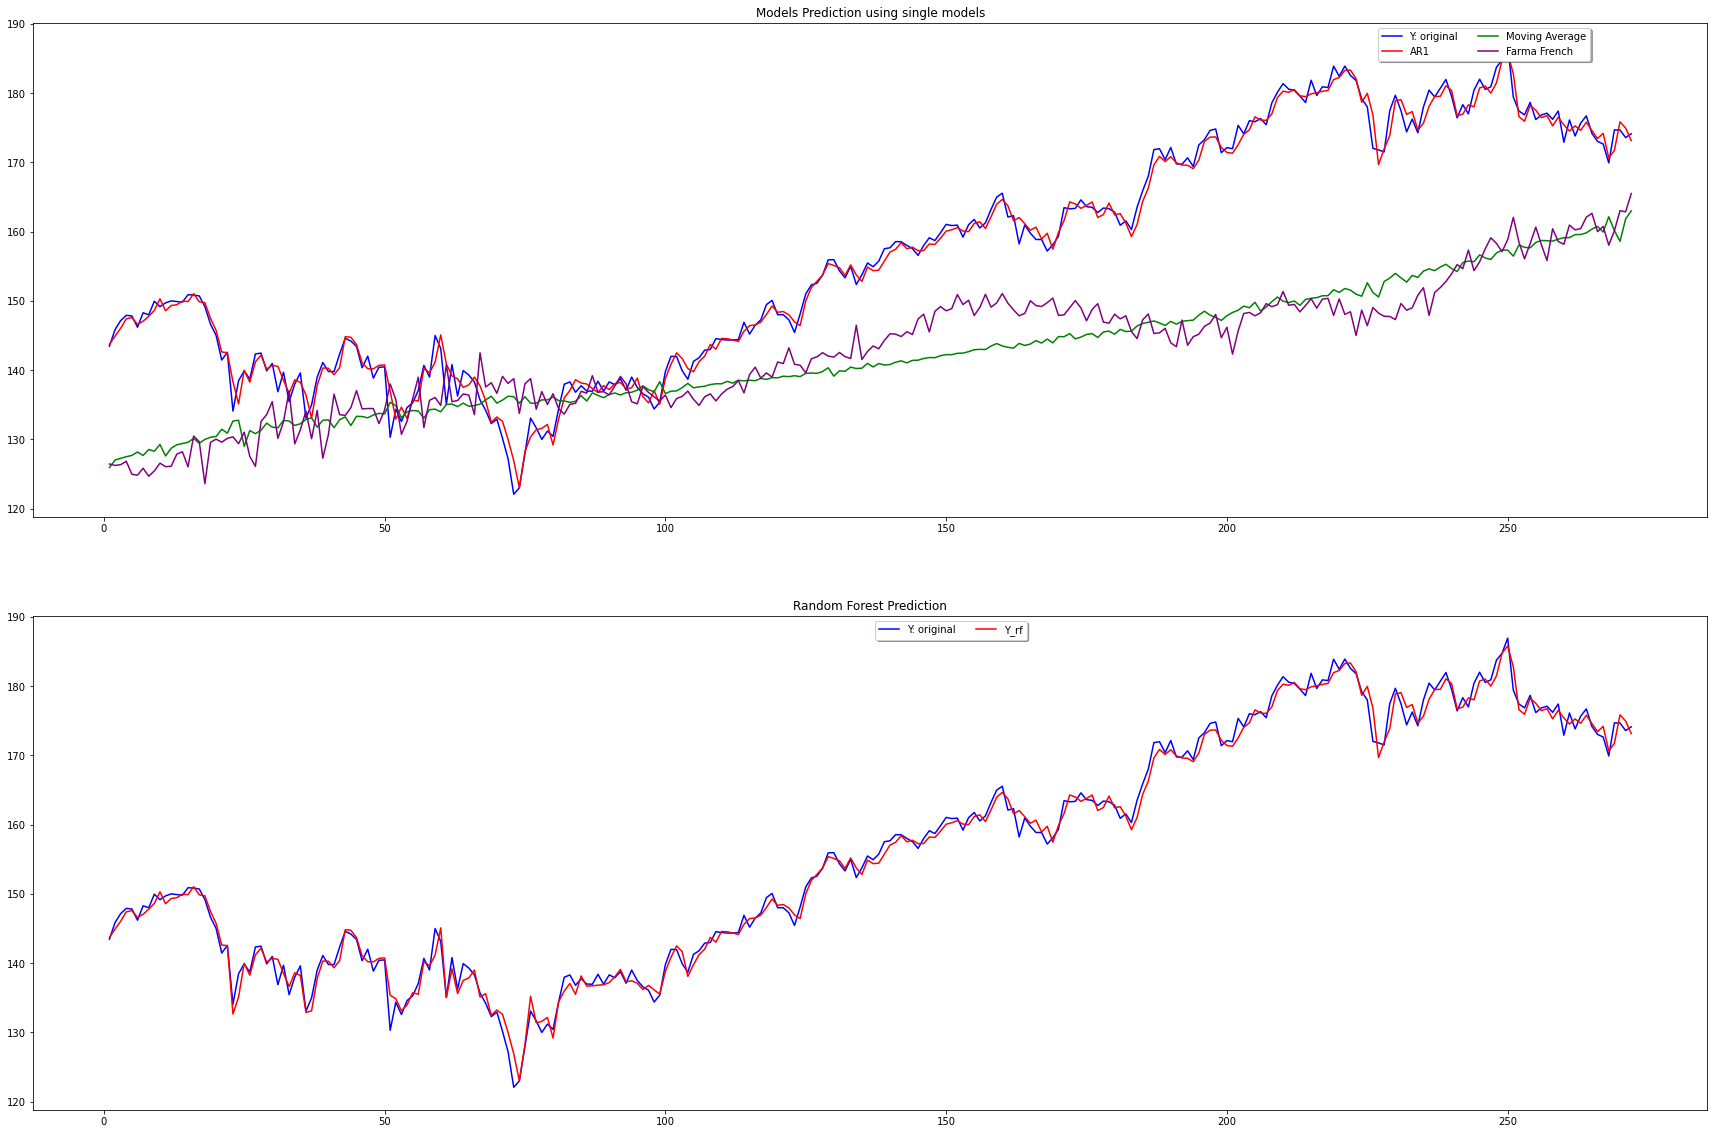

In [21]:
Y_rf,Y, Y_close = Randomforest()

In [22]:
results = np.stack([Y,Y_rf,Y_close],axis=1)

In [23]:
final_results = pd.DataFrame(results,columns=['Y','Y_rf','Y_close'])
final_results.head()

,Y,Y_rf,Y_close
0,143.460007,143.726058,145.490005
1,145.850006,144.908502,146.570007
2,147.149994,146.042885,147.630005
3,147.910004,147.405127,147.839996
4,147.830002,147.596033,146.179993


In [24]:
final_results.head()

,Y,Y_rf,Y_close
0,143.460007,143.726058,145.490005
1,145.850006,144.908502,146.570007
2,147.149994,146.042885,147.630005
3,147.910004,147.405127,147.839996
4,147.830002,147.596033,146.179993


In [25]:
final_results = final_results.reindex()

In [36]:
final_results

,Y,Y_rf,Y_close
0,143.460007,143.735125,145.490005
1,145.850006,144.922173,146.570007
2,147.149994,146.039689,147.630005
3,147.910004,147.394681,147.839996
4,147.830002,147.593865,146.179993
...,...,...,...
267,169.910004,170.637494,172.869995
268,174.679993,171.713264,175.979996
269,174.660004,175.829982,174.899994
270,173.570007,174.953997,172.419998
